In [534]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('winequality-red.csv')

In [535]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [536]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Note1: Classification model will be applied

In [537]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Note2: All are integers or float. No String/ object data type is present

In [538]:
df.shape

(1599, 12)

In [539]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(1359, 12)

# EDA
  # 1. Null/NaN

In [540]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

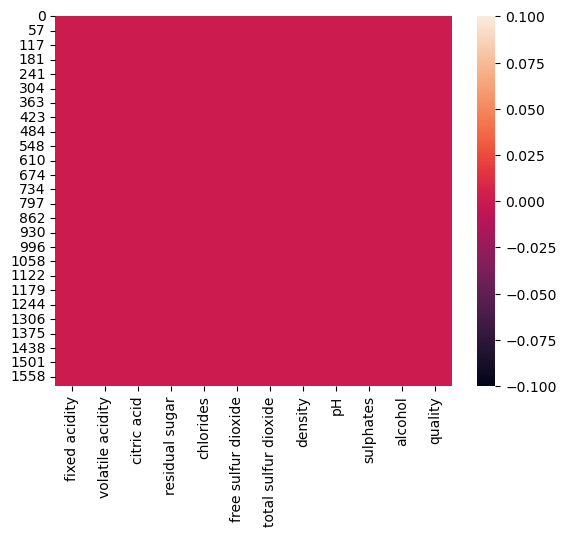

In [541]:
sns.heatmap(df.isnull())

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [543]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

fixed acidity
7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     121
5.0      88
15.0     65
12.0     64
10

### Note3: Zero null values

In [544]:
df.nunique().to_frame("No of unique values")

,No of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


# 2. Skewness, Outliars

In [545]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - No values observed
- Median (50%) < Mean - Slight deviation in "Total Sulphur dioxide" -> Right Skewed
- Standard Dev for "Total Sulphur dioxide" and "free sulfur dioxide" is high -> Outliars are present
- For "Total Sulphur dioxide" and "free sulfur dioxide": 75% and max : Diff is high - outliars are present


In [546]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

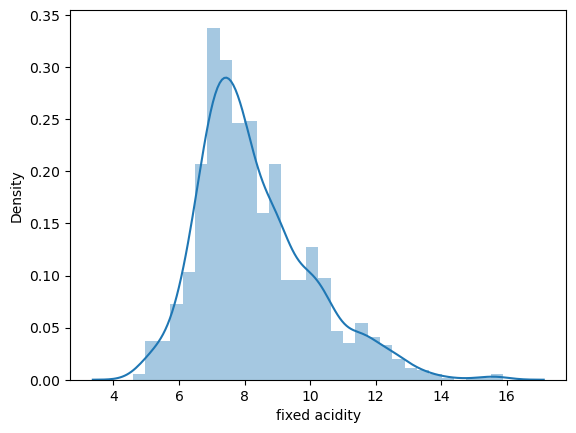

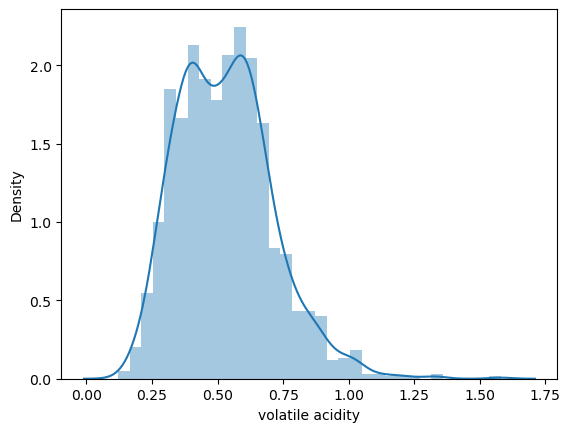

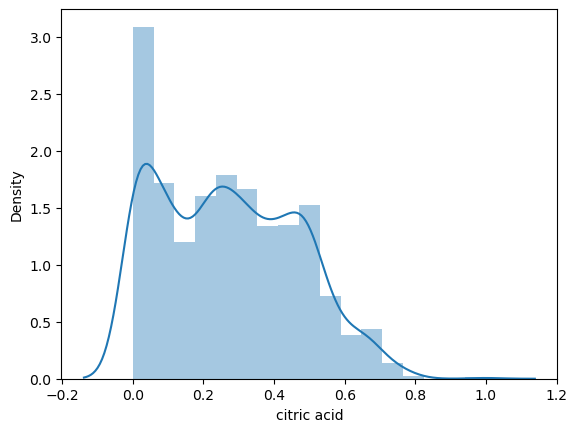

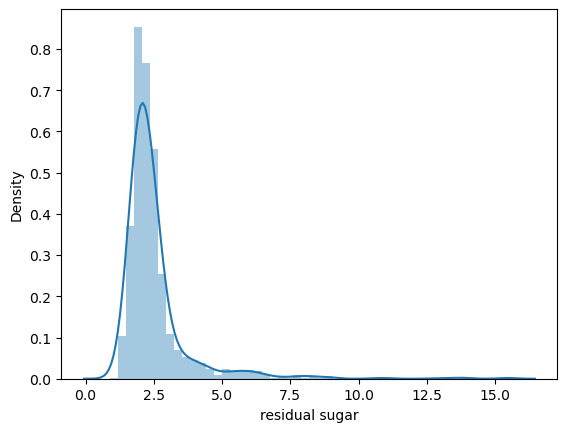

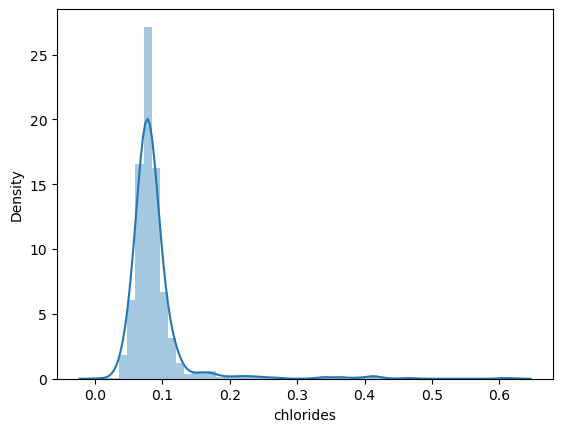

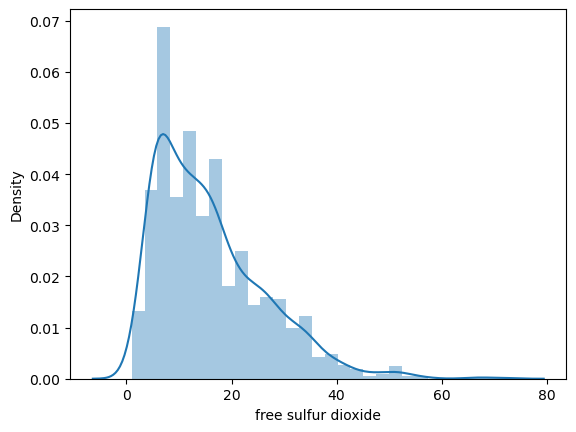

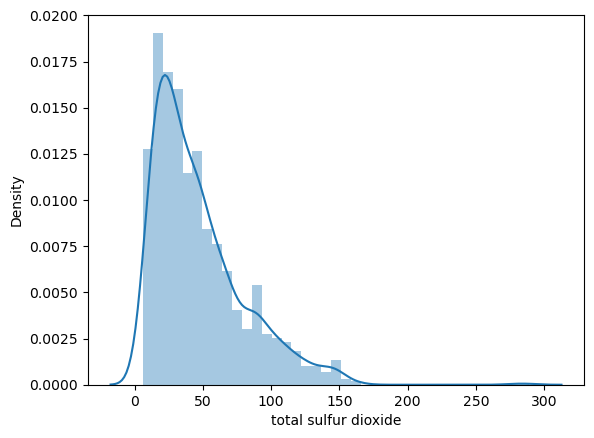

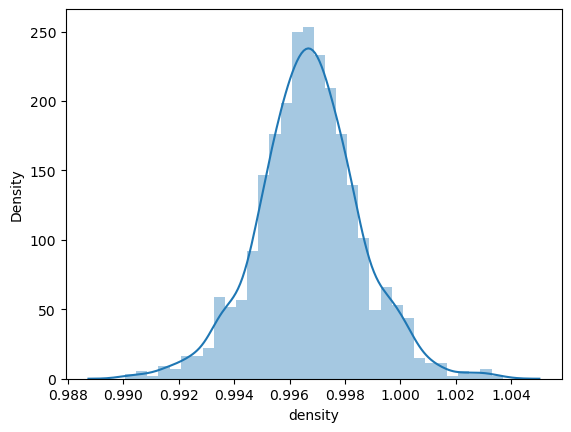

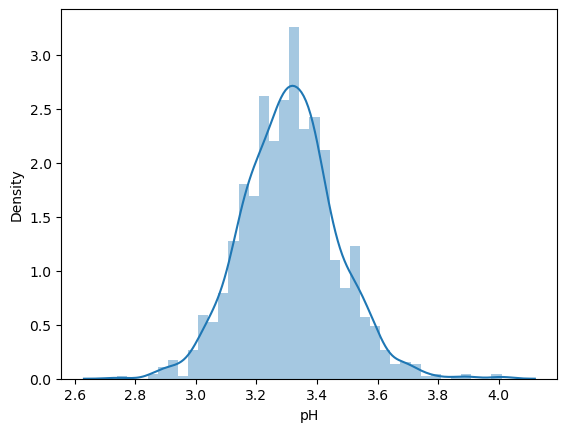

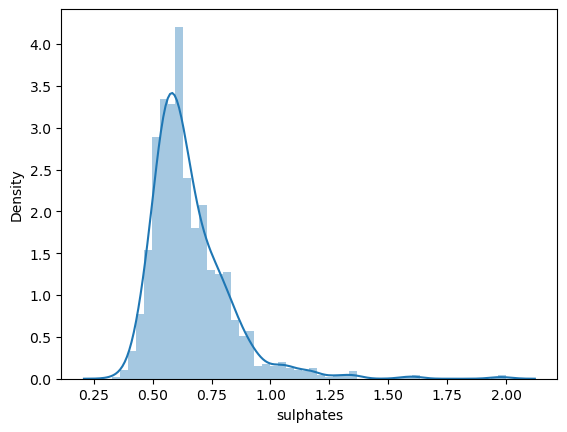

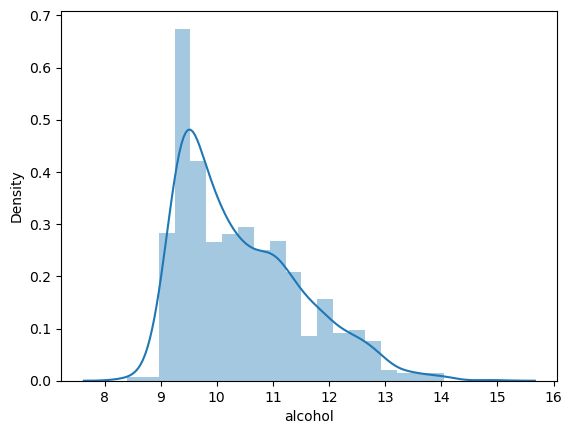

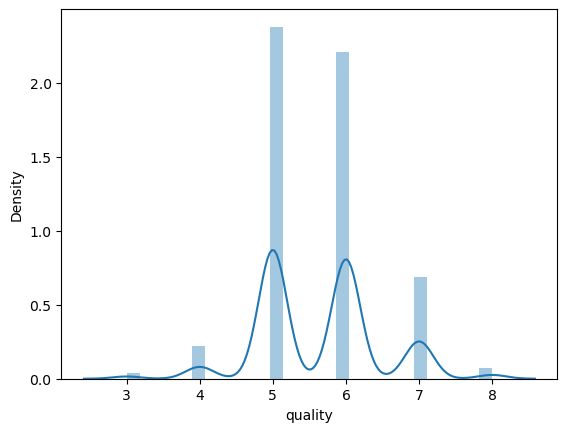

In [547]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

- Right Skewness observed in : "total sulfur dioxide","alcohol","free sulfur dioxide","residual sugar"

In [548]:
x= ["total sulfur dioxide","sulphates","free sulfur dioxide","residual sugar","chlorides"]   # Skewness removal
for i in x:
    df[i]=np.cbrt(df[i])

In [549]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          2.493356
chlorides               3.068605
free sulfur dioxide     0.246380
total sulfur dioxide    0.392816
density                 0.044778
pH                      0.232032
sulphates               1.350862
alcohol                 0.859841
quality                 0.192407
dtype: float64

<Figure size 1000x600 with 0 Axes>

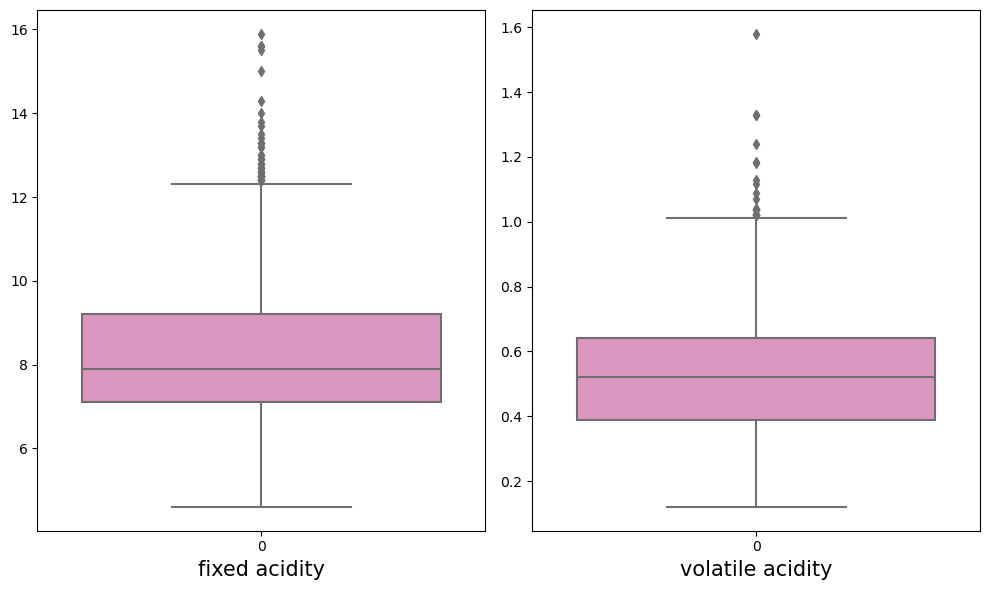

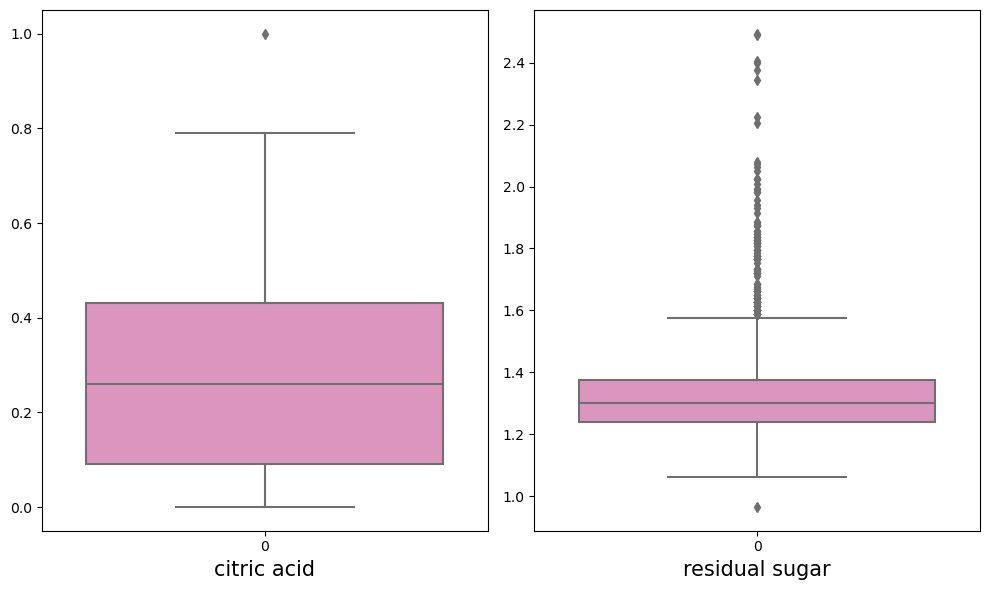

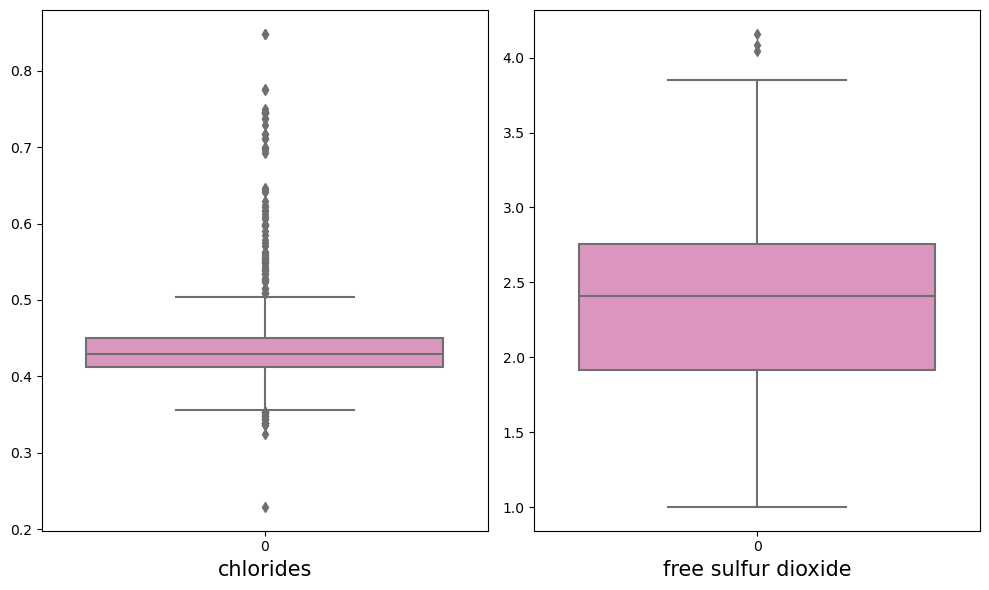

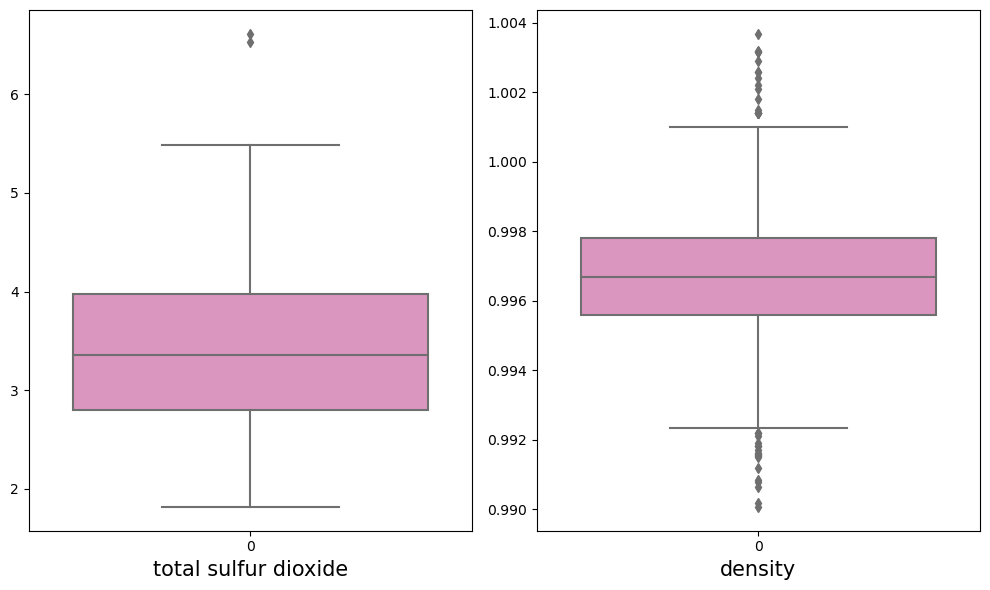

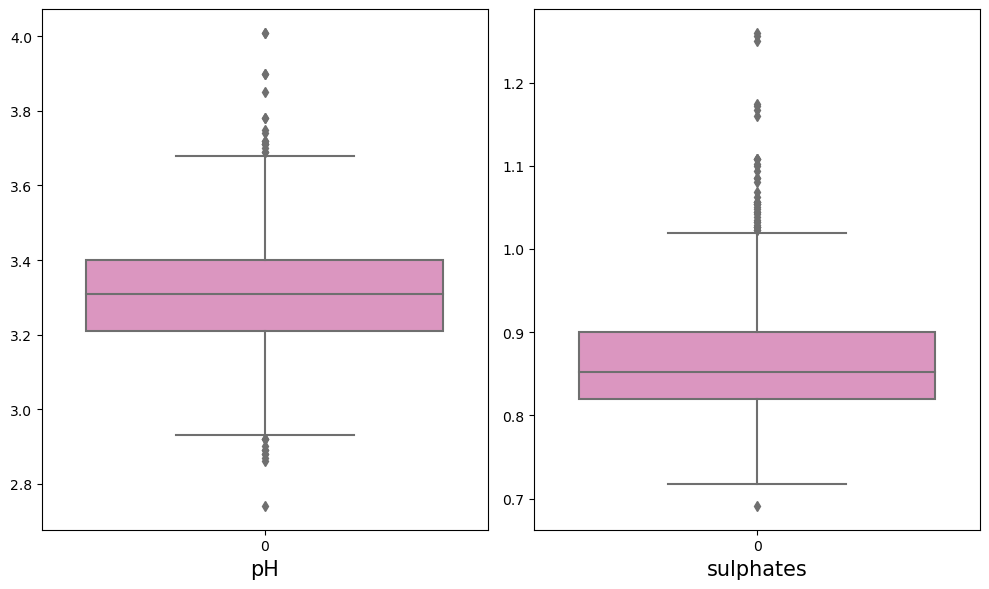

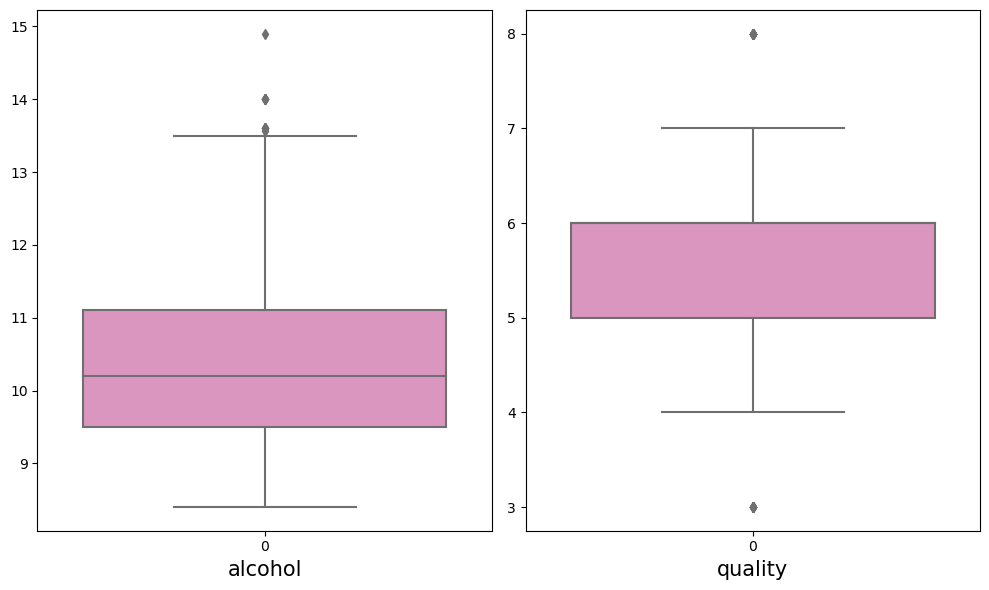

In [550]:
plt.figure(figsize=(10,6),facecolor="white")
plotnumber = 1
num_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for x in range (0,len(num_col),2):
    lst=[]
    lst.append(num_col[x])
    lst.append(num_col[x+1])
    plt.figure(figsize=(10,6),facecolor="white")
    plotnumber = 1
    for col in lst:
        if plotnumber <= 2:
            ax = plt.subplot(1,2,plotnumber)
            sns.boxplot(df[col],palette="Set2_r")
            plt.xlabel(col,fontsize = 15)
            plt.yticks (rotation = 0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()
    
    


Outliars observed in Fixed Acidity, Volatile Acidity, Residual Sugar, Chlorides, Free Sulfur dioxide,Total Sulfur dioxide, density,ph, sulphate

In [551]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
df1.shape
df.shape
print("Data loss rate",((df.shape[0]-df1.shape[0])/df.shape[0])*100)


Data loss rate 8.020603384841795


### Data Loss is less than 10%

# 3. Co- Relation

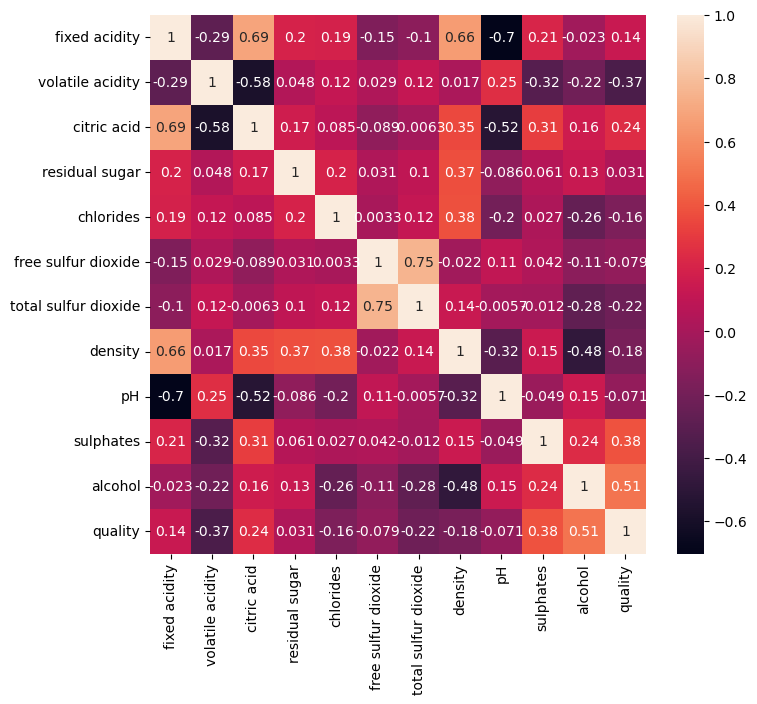

In [552]:
corr_hmap=df1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

- >0.3 or >-0.3  --> Low Corelation  Worst - [" residual sugar", "ph", "free sulphur dioxide"] Others - ["fixed acidity", "citric acid", "chlorides", "total sulphur dioxide","density"]
- >0.5 or >-0.5  --> Mod Corelation - "volatile acidity", "sulphate", "alchohol"
- >0.7 or >-0.7  --> High Corelation   - " No element found"



In [553]:
cor=df1.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.285765,0.690881,0.197996,0.192556,-0.151993,-0.100984,0.659557,-0.702971,0.213913,-0.023307,0.140658
volatile acidity,-0.285765,1.000000,-0.579098,0.048217,0.117625,0.029034,0.116888,0.016956,0.250818,-0.321480,-0.215509,-0.365749
citric acid,0.690881,-0.579098,1.000000,0.168163,0.085094,-0.088636,-0.006261,0.353955,-0.524827,0.309630,0.159990,0.243910
residual sugar,0.197996,0.048217,0.168163,1.000000,0.196694,0.031125,0.100696,0.370256,-0.085630,0.060987,0.134663,0.030503
chlorides,0.192556,0.117625,0.085094,0.196694,1.000000,0.003328,0.116581,0.375635,-0.201092,0.026507,-0.257592,-0.159581
free sulfur dioxide,-0.151993,0.029034,-0.088636,0.031125,0.003328,1.000000,0.753895,-0.021763,0.106132,0.042055,-0.106061,-0.079084
total sulfur dioxide,-0.100984,0.116888,-0.006261,0.100696,0.116581,0.753895,1.000000,0.137013,-0.005662,-0.011940,-0.281642,-0.223683
density,0.659557,0.016956,0.353955,0.370256,0.375635,-0.021763,0.137013,1.000000,-0.315537,0.146993,-0.483174,-0.181689
pH,-0.702971,0.250818,-0.524827,-0.085630,-0.201092,0.106132,-0.005662,-0.315537,1.000000,-0.048528,0.145183,-0.071429
sulphates,0.213913,-0.321480,0.309630,0.060987,0.026507,0.042055,-0.011940,0.146993,-0.048528,1.000000,0.238094,0.382573


# MultiColinearity

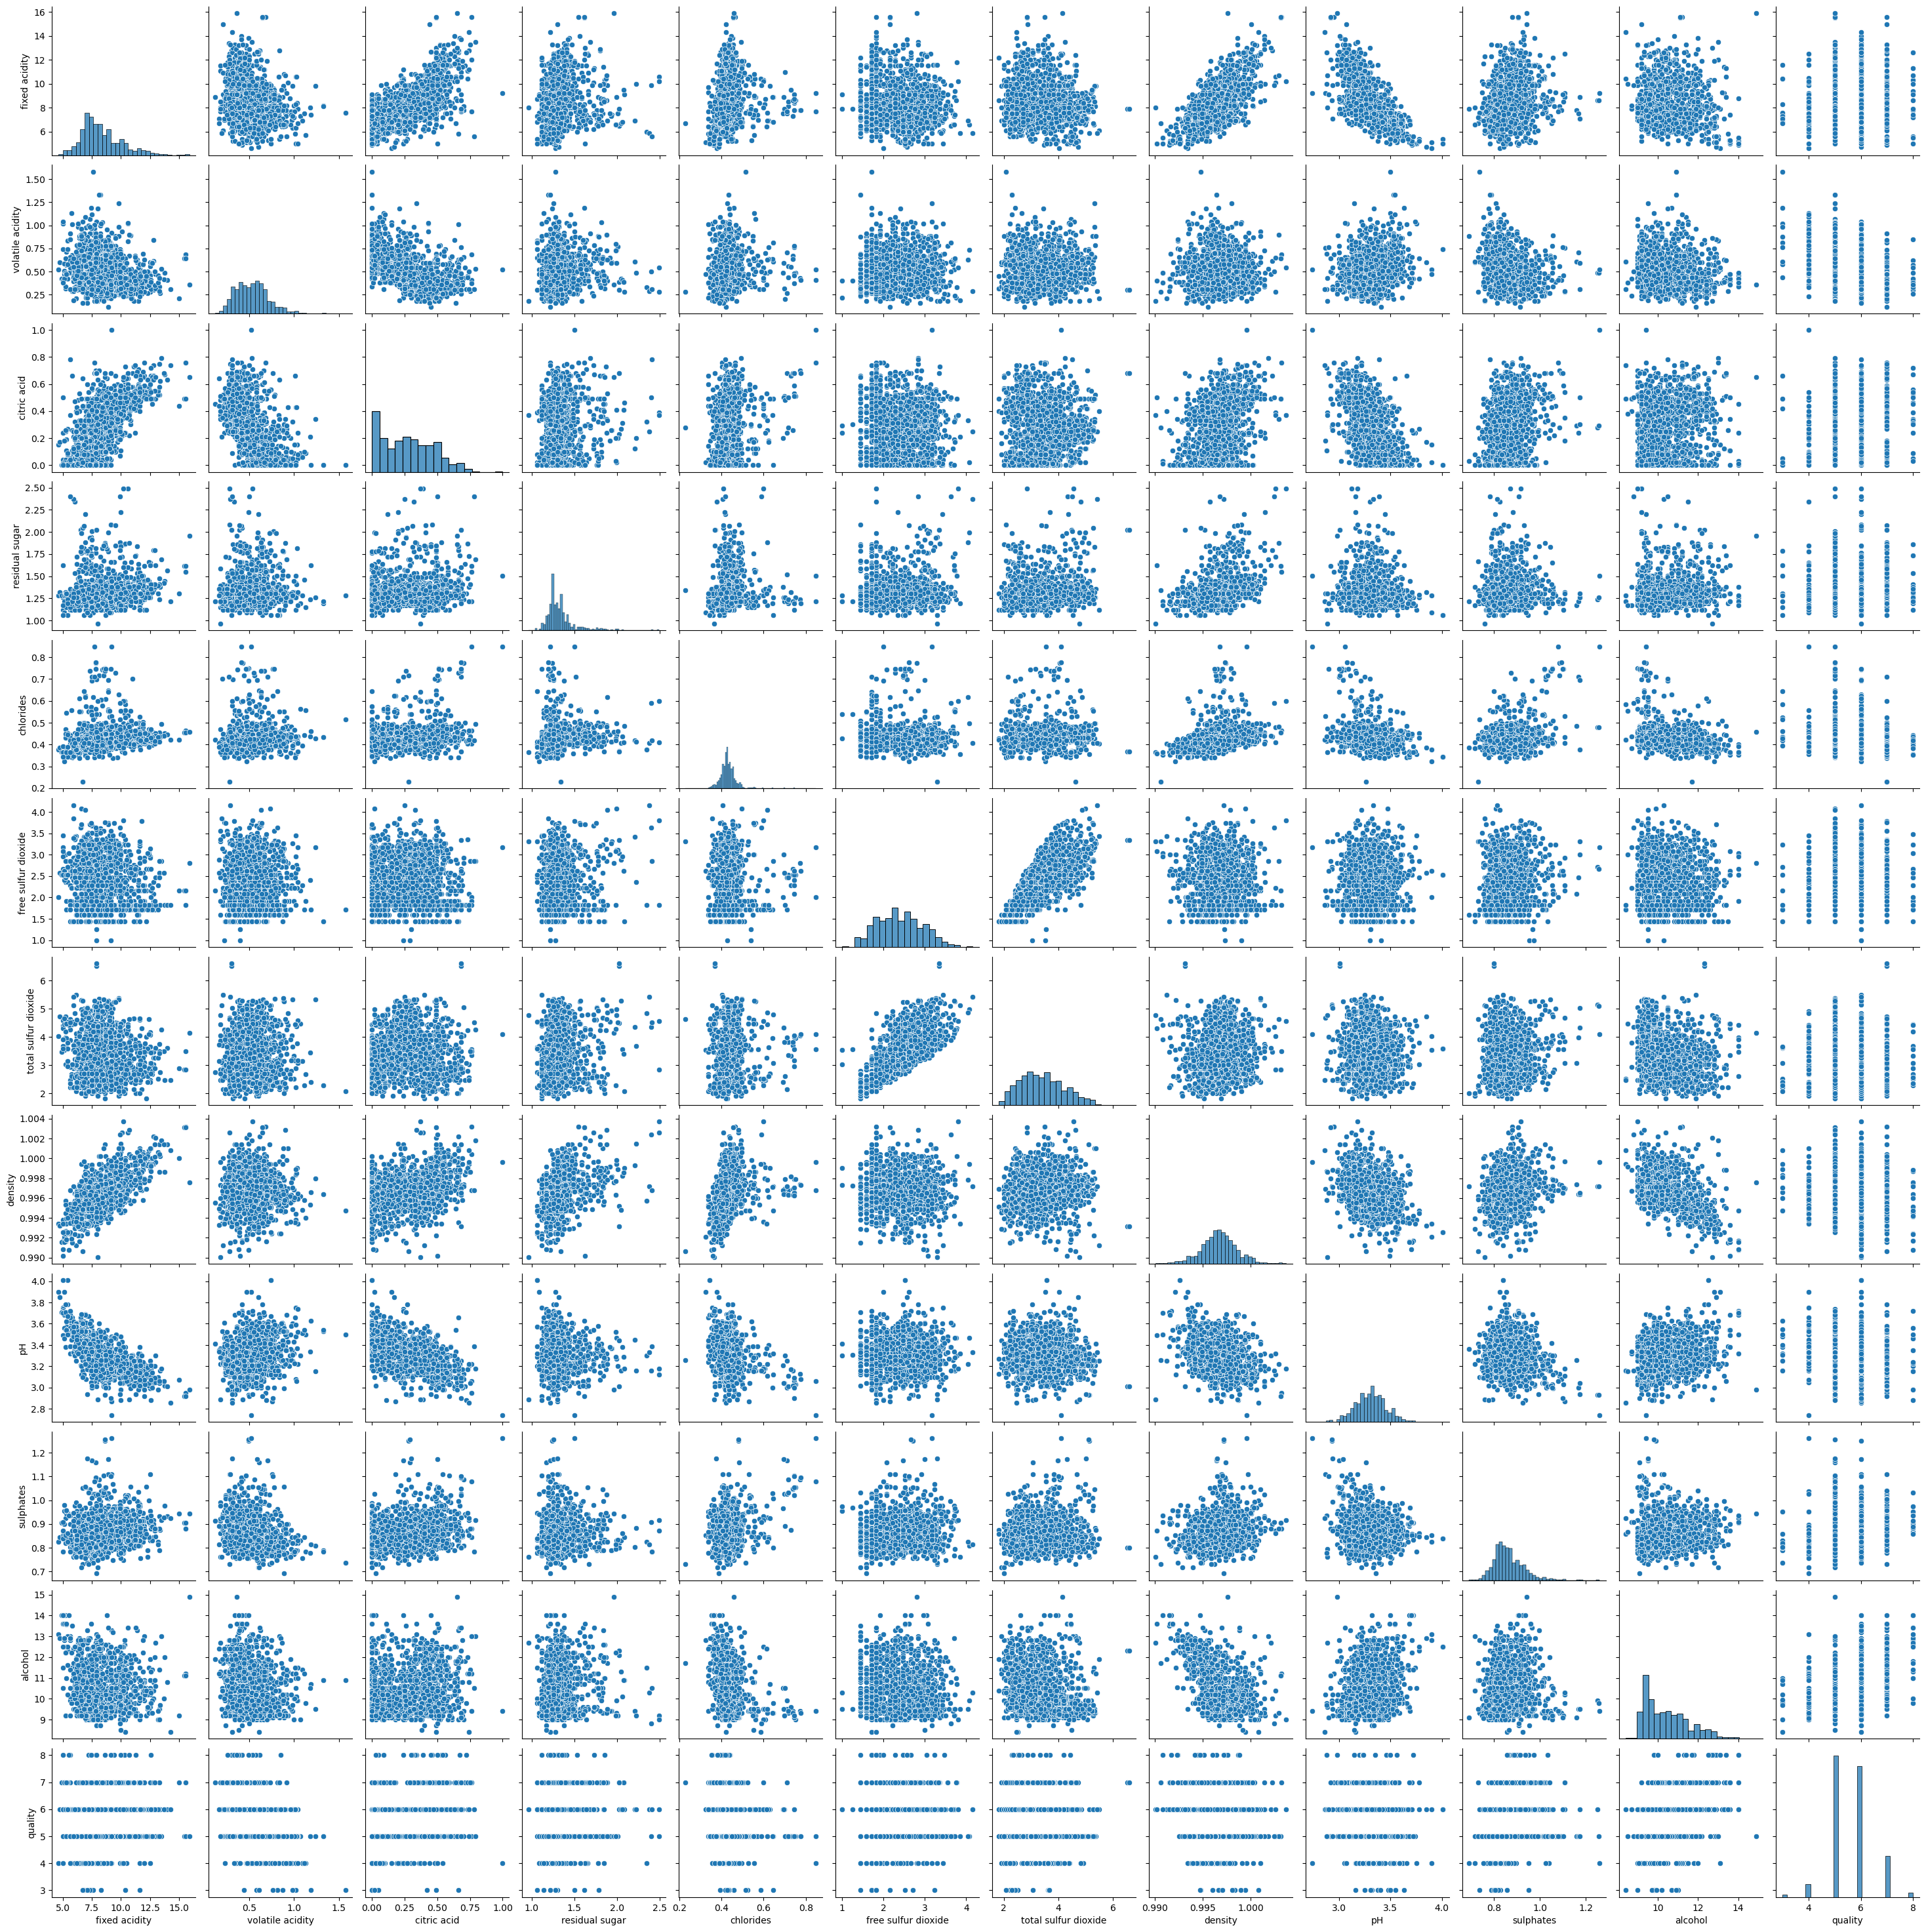

In [554]:
sns.pairplot(df)

In [555]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df1.iloc[:,0:-1]
x
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

     VIF Factor              features
0     86.401772         fixed acidity
1     18.445121      volatile acidity
2      9.165949           citric acid
3    116.733025        residual sugar
4    186.028141             chlorides
5     55.981081   free sulfur dioxide
6     57.764167  total sulfur dioxide
7   1998.641769               density
8   1246.077454                    pH
9    278.498006             sulphates
10   144.185087               alcohol


- >0.3 or >-0.3  --> Low Corelation  Worst - [" residual sugar", "ph", "free sulphur dioxide"] Others - ["fixed acidity", "citric acid", "chlorides", "total sulphur dioxide","density"]
- >0.5 or >-0.5  --> Mod Corelation - "volatile acidity", "sulphate", "alchohol"
- >0.7 or >-0.7  --> High Corelation   - " No element found"


Considering least co-relation with output. and multicolinearity "ph" can be removed.

In [556]:
columns_to_drop=["pH","density","residual sugar","free sulfur dioxide",]
df2 = df1.drop(columns_to_drop, axis=1)
df2

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.423582,3.239612,0.824257,9.4,5
1,7.8,0.880,0.00,0.461044,4.061548,0.879366,9.8,5
2,7.8,0.760,0.04,0.451436,3.779763,0.866239,9.8,5
3,11.2,0.280,0.56,0.421716,3.914868,0.833955,9.8,6
5,7.4,0.660,0.00,0.421716,3.419952,0.824257,9.4,5
...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.408166,3.361975,0.935990,9.5,6
1594,6.2,0.600,0.08,0.448140,3.530348,0.833955,10.5,5
1595,5.9,0.550,0.10,0.395789,3.708430,0.912581,11.2,6
1597,5.9,0.645,0.12,0.421716,3.530348,0.892112,10.2,5


In [557]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df2.iloc[:,0:-1]
x
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

   VIF Factor              features
0   54.632471         fixed acidity
1   16.923466      volatile acidity
2    8.347539           citric acid
3  130.463344             chlorides
4   21.257629  total sulfur dioxide
5  199.356262             sulphates
6   94.580055               alcohol


# MODEL

# 1. Feature Scaling using Standard Scalarization

In [558]:
# to remove biasness. Standard Scaler consider Zero as mean and 1 as std dev value
x=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol
0,-0.546820,1.009988,-1.398142,-0.206288,-0.193535,-0.619555,-0.988416
1,-0.304521,2.048786,-1.398142,0.871512,0.855425,0.339055,-0.602306
2,-0.304521,1.356254,-1.187636,0.595083,0.495809,0.110716,-0.602306
3,1.755018,-1.413873,1.548949,-0.259975,0.668230,-0.450859,-0.602306
4,-0.546820,0.779144,-1.398142,-0.259975,0.036616,-0.619555,-0.988416
...,...,...,...,...,...,...,...
1245,-0.910268,0.548301,-0.977129,-0.649847,-0.037374,1.324025,-0.891888
1246,-1.273716,0.432879,-0.977129,0.500275,0.177505,-0.450859,0.073387
1247,-1.455440,0.144324,-0.871876,-1.005927,0.404773,0.916818,0.749079
1248,-1.455440,0.692578,-0.766623,-0.259975,0.177505,0.560774,-0.216196


# 2. OverSampling

In [559]:
y.value_counts()

quality
5    537
6    496
7    155
4     47
8     15
Name: count, dtype: int64

In [560]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [561]:
y.value_counts()

quality
5    537
6    496
7    155
4     47
8     15
Name: count, dtype: int64

In [562]:
y1.value_counts()

quality
5    537
6    537
7    537
4    537
8    537
Name: count, dtype: int64

# 3. Best random state value:

In [563]:
y1.unique() # Will apply classification model

array([5, 6, 7, 4, 8], dtype=int64)

In [564]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.8362282878411911  at random state  152


# 4. Creating train test split

In [565]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# 5. Classification Algorithms and Cross Validation Score

In [566]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

Accuracy Score of:   RandomForestClassifier()  is 
0.8200992555831266
[[145   9   2   0   0]
 [ 14  98  38   6   0]
 [  4  33  93  18   2]
 [  2   3  10 147   1]
 [  0   0   1   2 178]]
              precision    recall  f1-score   support

           4       0.88      0.93      0.90       156
           5       0.69      0.63      0.66       156
           6       0.65      0.62      0.63       150
           7       0.85      0.90      0.87       163
           8       0.98      0.98      0.98       181

    accuracy                           0.82       806
   macro avg       0.81      0.81      0.81       806
weighted avg       0.82      0.82      0.82       806



Cross Validation of:   RandomForestClassifier()  is 
[0.77839851 0.77467412 0.79329609 0.79888268 0.80633147]
0.7903165735567971
Diff in Acc Score and Cross Val Score is -  0.0297826820263295


Accuracy Score of:   ExtraTreesClassifier()  is 
0.8349875930521092
[[143  12   1   0   0]
 [  9 107  34   6   0]
 [  7  33  92  

### Best Model is : ExtraTreesClassifier

# 6. Hyper Parameter Tuning

In [567]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion" : ["gini", "entropy", "log_loss"],
             "random_state" :[maxRS],
             "max_depth": [0,10,20],
             "n_jobs": [-2,-1,1],
             "n_estimators":[50,100,200,300],
             "class_weight": ["balanced", "balanced_subsample"],
             "max_features": ["sqrt","log2","None"]}

In [568]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=7)

In [569]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [152]})

In [570]:
GCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 152}

In [571]:
etc_bp = ExtraTreesClassifier(criterion="entropy",random_state=152,max_features="sqrt",max_depth=20, class_weight="balanced",n_estimators=200,n_jobs=-2)
etc_bp.fit(x_train,y_train)
pred=etc_bp.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.98759305210918


# 7. Plotting ROC

In [572]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=140)

from sklearn import metrics
etc_bp=ExtraTreesClassifier()

etc_bp.fit(x_train,y_train)
etc_bp.score(x_train,y_train)
predm=etc_bp.predict(x_test)
roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr')


#y_pred_prob = etc.predict_proba(x_test)[:,1]
#fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,)
#tpr


0.995670529445659

# 8. Saving the Model

In [575]:
import joblib # save as *.pkl
joblib.dump(etc_bp,"Redwine_project_v1.pkl")

['Redwine_project_v1.pkl']